Nome: Thiago Raimundo da Silva

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#####  Primeiramente foi contrutro funções para a finalidade de protar os graficos necessarios, sendo uma responsavel por plotar o grafico de distribuição *(plotDiatribuicao)* e outro plotar um grafivo BoxPlot *(plotdeBoxplot)*, ambas recebendo como parametro um dataframe. Alem disso tambem foi feita uma função para o calculo da media e o intervalo de confiança *(calculoMediaIC)* que toma como parametro uma serie.

In [2]:
def calculoMediaIC(serie):
    tempos_quick = serie

    media = np.mean(tempos_quick)

    # Cálculo do intervalo de confiança 95%
    n = len(tempos_quick)
    desvio_padrao = np.std(tempos_quick, ddof=1) 
    erro_padrao = desvio_padrao / np.sqrt(n)
    margem_erro = stats.t.ppf(0.975, df=n-1) * erro_padrao  # t-score para n-1 graus de liberdade

    ic_inferior = media - margem_erro
    ic_superior = media + margem_erro

    print(f"Média: {media:.2f} ms")
    print(f"Intervalo de Confiança 95%: [{ic_inferior:.2f}, {ic_superior:.2f}] ms")
    print(f"Margem de erro: ±{margem_erro:.2f} ms")

In [3]:
def plotdeBoxplot(dataframe):
    data = dataframe

    
    confidence_interval = {}
    for column in ['QUICK', 'MERGE', 'COUNTING']:
        mean = np.mean(data[column])
        sem = stats.sem(data[column])  # erro padrão da média
        ci = stats.t.interval(0.95, len(data[column])-1, loc=mean, scale=sem)  # intervalo de confiança de 95%
        confidence_interval[column] = ci

    # gráfico boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=[data['QUICK'], data['MERGE'], data['COUNTING']], 
                ax=plt.gca(), 
                palette=["skyblue", "green", "red"])

    # Adicionar médias
    means = [np.mean(data['QUICK']), np.mean(data['MERGE']), np.mean(data['COUNTING'])]
    for i, mean in enumerate(means):
        plt.scatter(i, mean, color='black', zorder=10)

    # Adicionar o intervalo de confiança
    for i, column in enumerate(['QUICK', 'MERGE', 'COUNTING']):
        ci = confidence_interval[column]
    plt.plot([i, i], [ci[0], ci[1]], color='black', lw=2)

    plt.title('Boxplot com Média e Intervalo de Confiança')
    plt.xlabel('Algoritmos de Ordenação')
    plt.ylabel('Tempo (ms)')
    plt.xticks([0, 1, 2], ['QUICK', 'MERGE', 'COUNTING'])
    plt.grid(True)
    plt.show()

In [4]:
def plotDistribuicao(dataFrame):
    data = dataFrame

    plt.figure(figsize=(6, 4))

    # Plotando os valores de QUICK, MERGE e COUNTING
    plt.scatter([0] * len(data), data['QUICK'], color='blue', label='QUICK', alpha=0.6)
    plt.scatter([1] * len(data), data['MERGE'], color='green', label='MERGE', alpha=0.6)
    plt.scatter([2] * len(data), data['COUNTING'], color='red', label='COUNTING', alpha=0.6)


    plt.title('Comparação de Tempos de Execução dos Algoritmos de Ordenação')
    plt.xlabel('Algoritmos de Ordenação')
    plt.ylabel('Tempo (ms)')
    plt.xticks([0, 1, 2], ['QUICK', 'MERGE', 'COUNTING'])
    plt.legend()
    plt.grid(True)
    plt.show()

### Questão 1 letra A

#### Nesse ponto foi carregado os dados das primeiras medições feitas com os algoritmos de ordenação, foi calculado a media e o Intervalo de Confiança para as medições feitas em com cada algoritmo

In [ ]:
valores = pd.read_csv('Tabelas/PrimeiraExecucao.csv')
valores

In [7]:
quick= valores["QUICK"]
merge= valores["MERGE"]
counting= valores["COUNTING"]

In [8]:
quick.describe()

count      30.000000
mean      997.166667
std        13.279705
min       971.000000
25%       988.000000
50%       995.000000
75%      1001.500000
max      1029.000000
Name: QUICK, dtype: float64

In [9]:
merge.describe()

count      30.000000
mean     1330.500000
std        16.625178
min      1302.000000
25%      1325.250000
50%      1328.000000
75%      1333.000000
max      1391.000000
Name: MERGE, dtype: float64

In [10]:
counting.describe()

count     30.000000
mean     393.166667
std       19.282086
min      378.000000
25%      382.000000
50%      389.000000
75%      396.750000
max      460.000000
Name: COUNTING, dtype: float64

#### Calculo para determinar quantas vezes cada algoritmo deve ser executado (tamanho da amostra) para que se tenha um intervalo de confiança com uma margem de erro menor ou igual a 2%, para um nível de confiança de 95%.
##### Caso seja necessario o valor deve ser arredondado para cima

In [11]:
tamanhoAmostraQuick = ((1.96*quick.std()) / (0.02 * quick.mean())) **2
print(tamanhoAmostraQuick)

1.7033093319658996


In [62]:
tamanhoAmostraMerge = ((1.96*merge.std())/(0.02*merge.mean()))**2
print(tamanhoAmostraMerge)

1.4995295006164424


In [13]:
tamanhoAmostraCounting = ((1.96*counting.std())/(0.02*counting.mean()))**2
print(tamanhoAmostraCounting)

23.0997251860558


###  Questão 1 letra B
#### Nessa etapa foi realozada medições com os algoritmos com o numero de repetição igual ao maior valor n obtido na anteriormente, nesse caso 24 veses, apos isso foi calculado a media e o desvio padrão para as medições de cada alforitmo. Foram plorados graficos boxplot e de destribuição para melhor visualização dos resultados.

In [ ]:
IC= pd.read_csv("Tabelas/1b.csv")
IC

#### Calcular Média e Intervalo de Confiança

In [15]:
calculoMediaIC(IC["QUICK"])

Média: 993.87 ms
Intervalo de Confiança 95%: [989.71, 998.02] ms
Margem de erro: ±4.15 ms


In [16]:
calculoMediaIC(IC["MERGE"])

Média: 1361.60 ms
Intervalo de Confiança 95%: [1342.86, 1380.34] ms
Margem de erro: ±18.74 ms


In [17]:
calculoMediaIC(IC["COUNTING"])

Média: 392.47 ms
Intervalo de Confiança 95%: [389.44, 395.49] ms
Margem de erro: ±3.03 ms


#### Plot dos graficos

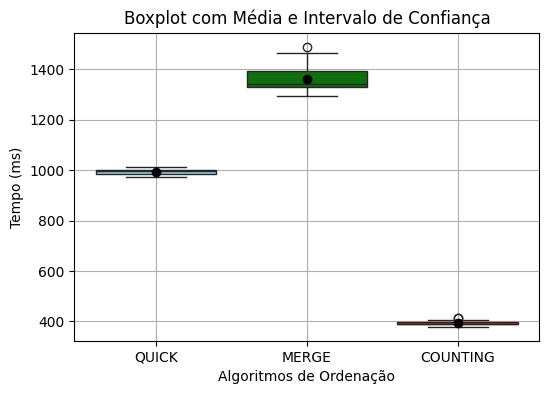

In [18]:
plotdeBoxplot(IC)

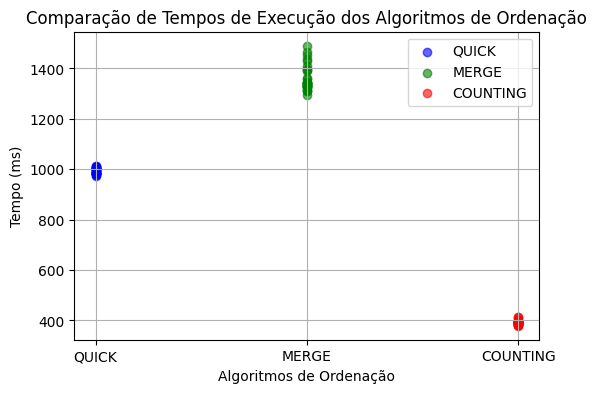

In [19]:
plotDistribuicao(IC)

### Questão 2

#### A questão busca analisar como o tempo de ordenação de cada algoritmo varia ao mudarmos a entrada. para isso foram realizados 4 rodadas de medições variand os valores de tamanho de entrada e de valor maximo. 
#### Primeiramente foram feitas as medições variando o Tamanho da Entrada e mantendo o valor maximo em 940.000 (940 mil), as primeiras medições foram feitas com o valor de Tamanho de entrada sendo igual a 9,4 milhoes, apos isso foi calculado a media e o Intervalo de Confiança e plotado graficos para os valores de cada algoritmo. Apos essa foram realizadas novas medições, agora com o valor do Tamanho de Entrada sendo igual a 94 milhões.
#### Depois disso houve a mudança na forma como seriam realizadas as medições, agora o valor do tamanho da entrada seria fixo em 9400000 (9,4 milhões) e o valor máximo de entrada iria varias em dois valores: 940000 (940 mil) e 94000000 (94 milhões). Tambem foi calculado a media e o Intervalo de confiança assim como foi plotado graficos para essas medições 

### QUESTÃO 2 LETRA a)

##### Medições feitas com a variação de tamanho 9,4 milhoes

In [ ]:
variacaoTamanhoA= pd.read_csv("Tabelas/Tamanho9400000.csv")
variacaoTamanhoA

In [21]:
calculoMediaIC(variacaoTamanhoA["QUICK"])

Média: 1002.23 ms
Intervalo de Confiança 95%: [995.34, 1009.13] ms
Margem de erro: ±6.89 ms


In [22]:
calculoMediaIC(variacaoTamanhoA["MERGE"])

Média: 1330.57 ms
Intervalo de Confiança 95%: [1322.02, 1339.12] ms
Margem de erro: ±8.55 ms


In [23]:
calculoMediaIC(variacaoTamanhoA["COUNTING"])

Média: 389.50 ms
Intervalo de Confiança 95%: [385.12, 393.88] ms
Margem de erro: ±4.38 ms


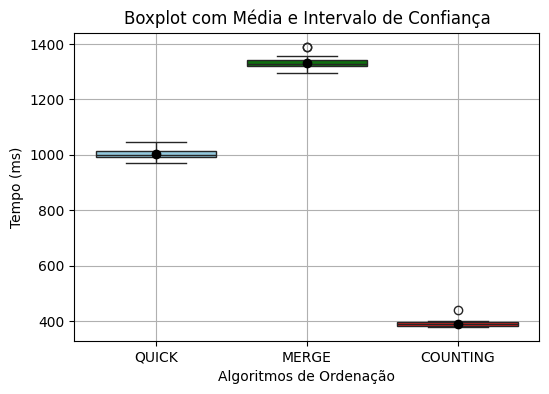

In [24]:
plotdeBoxplot(variacaoTamanhoA)

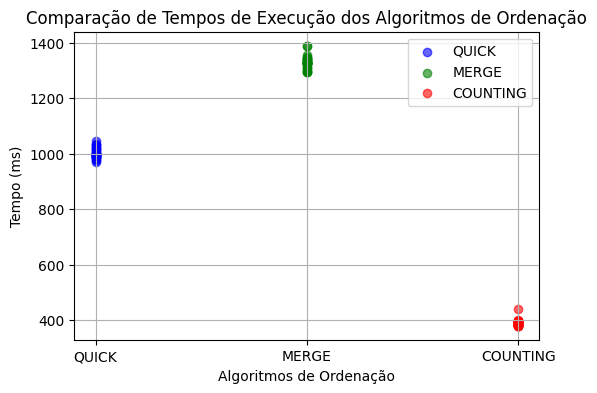

In [25]:
plotDistribuicao(variacaoTamanhoA)

##### Medições feitas com a variação de tamanho 94 milhoes

In [ ]:
variacaoTamanhoB= pd.read_csv("Tabelas/Tamanho94000000.csv")
variacaoTamanhoB

In [27]:
calculoMediaIC(variacaoTamanhoB["QUICK"])

Média: 15718.77 ms
Intervalo de Confiança 95%: [15589.64, 15847.90] ms
Margem de erro: ±129.13 ms


In [28]:
calculoMediaIC(variacaoTamanhoB["MERGE"])

Média: 13306.73 ms
Intervalo de Confiança 95%: [13265.45, 13348.02] ms
Margem de erro: ±41.28 ms


In [29]:
calculoMediaIC(variacaoTamanhoB["COUNTING"])

Média: 4995.37 ms
Intervalo de Confiança 95%: [4959.36, 5031.37] ms
Margem de erro: ±36.01 ms


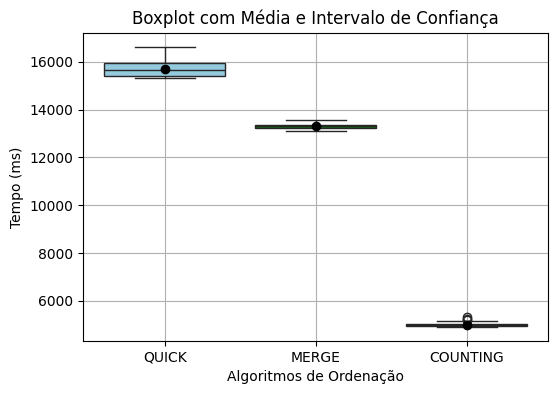

In [30]:
plotdeBoxplot(variacaoTamanhoB)

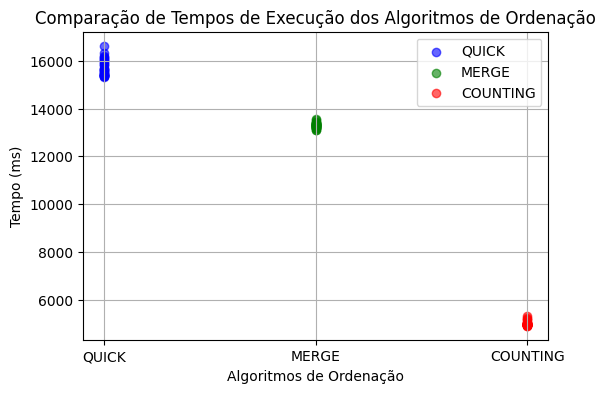

In [31]:
plotDistribuicao(variacaoTamanhoB)

### QUESTÃO 2 LETRA b)

##### Medições feitas com a variação de Valor Maximo igual a 940 mil

In [ ]:
variacaoValorMaximoA = pd.read_csv("Tabelas/ValorMaximo940000.csv")
variacaoValorMaximoA


In [37]:
calculoMediaIC(variacaoTamanhoA["QUICK"])

Média: 1002.23 ms
Intervalo de Confiança 95%: [995.34, 1009.13] ms
Margem de erro: ±6.89 ms


In [38]:
calculoMediaIC(variacaoTamanhoA["MERGE"])

Média: 1330.57 ms
Intervalo de Confiança 95%: [1322.02, 1339.12] ms
Margem de erro: ±8.55 ms


In [39]:
calculoMediaIC(variacaoTamanhoA["COUNTING"])

Média: 389.50 ms
Intervalo de Confiança 95%: [385.12, 393.88] ms
Margem de erro: ±4.38 ms


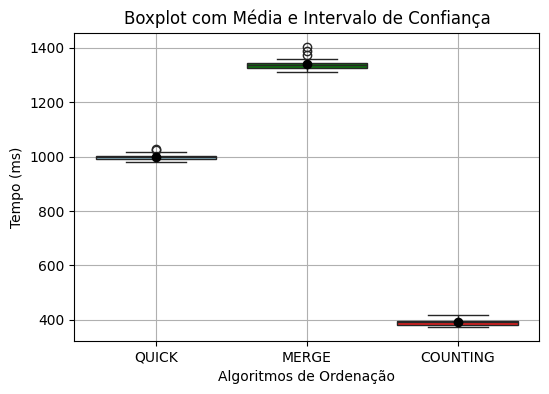

In [40]:
plotdeBoxplot(variacaoValorMaximoA)

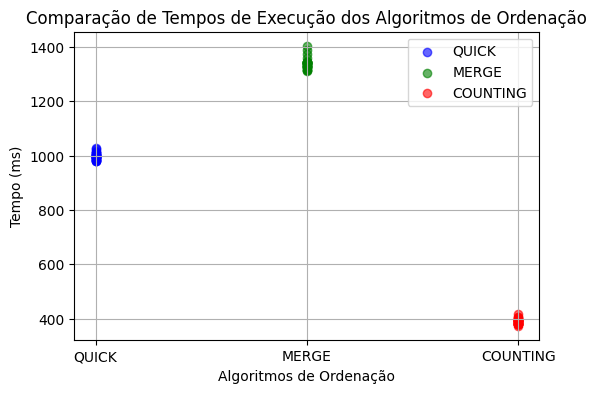

In [41]:
plotDistribuicao(variacaoValorMaximoA)

##### Medições feitas com a variação de Valor Maximo igual a 94 milhões

In [ ]:
variacaoValorMaximoB= pd.read_csv("Tabelas/ValorMaximo94000000.csv")
variacaoValorMaximoB

In [44]:
calculoMediaIC(variacaoTamanhoB["QUICK"])

Média: 15718.77 ms
Intervalo de Confiança 95%: [15589.64, 15847.90] ms
Margem de erro: ±129.13 ms


In [45]:
calculoMediaIC(variacaoTamanhoB["MERGE"])

Média: 13306.73 ms
Intervalo de Confiança 95%: [13265.45, 13348.02] ms
Margem de erro: ±41.28 ms


In [46]:
calculoMediaIC(variacaoTamanhoB["COUNTING"])

Média: 4995.37 ms
Intervalo de Confiança 95%: [4959.36, 5031.37] ms
Margem de erro: ±36.01 ms


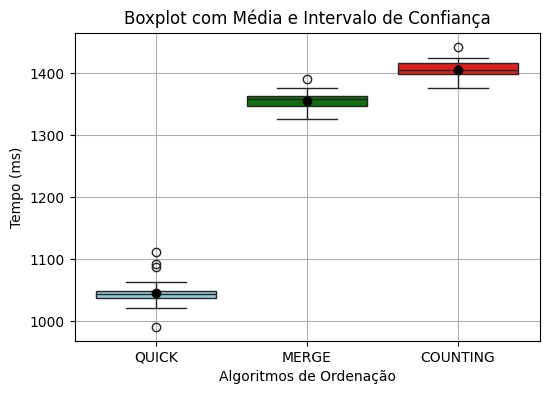

In [47]:
plotdeBoxplot(variacaoValorMaximoB)

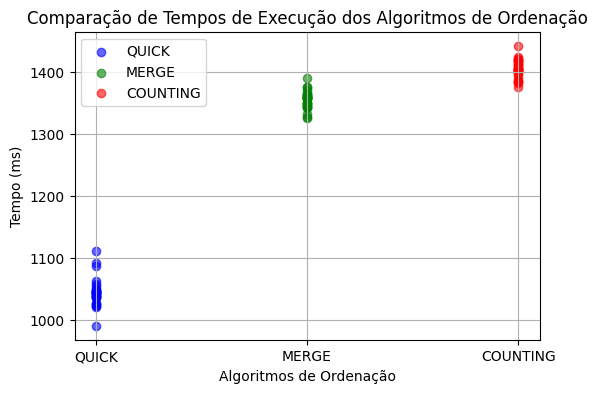

In [48]:
plotDistribuicao(variacaoValorMaximoB)

### QUESTÃO 3-  Com base nas questões anteriores e em outras análises que você pode fazer, quais algoritmos são os mais adequados para diferentes situações de tamanho da entrada e do valor máximo?

#### Tendo observado o desempenho dos algoritmos nas execuções e os seus resultados levando em conta as mudanças de valores tanto no tamanho da amostra quanto no valor máximo o algoritmo mais indicado seria o COUNT por, na maioria das vezes, apresentar os melhores resultados de médias do tempo de execução e maior consistência, apresentando o melhor desempenho geral na maioria das execuções. com exceção da execução realizada com o valor máximo sendo de 94 milhões o que indica que para casos onde o calor máximo forem muito altos o melhor algoritmo seria o QUICK